# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2021**

Мягкий дедлайн: **27.10.21 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **29.10.21 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

\begin{align*}
    \nabla Q(w) &= \frac{2}{\ell}X^T(Xw - y)
\end{align*}

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/homeworks-practice/homework-practice-03-gd/adam.jpg?raw=1)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [ ]:
%load_ext autoreload

In [ ]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [ ]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [ ]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [ ]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/29933/enter/). Я a.dtc в Контесте :)

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/29933/run-report/56229922/


* **StochasticDescent**: https://contest.yandex.ru/contest/29933/run-report/56227229/


* **MomentumDescent**: https://contest.yandex.ru/contest/29933/run-report/56230246/


* **Adam**: https://contest.yandex.ru/contest/29933/run-report/56232064/


* **LinearRegression**: https://contest.yandex.ru/contest/29933/run-report/56232328/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [ ]:
data = pd.read_csv('https://github.com/esokolov/ml-course-hse/raw/master/2021-fall/homeworks-practice/homework-practice-03-gd/autos.csv')

In [ ]:
data.head()

brand    model vehicleType  ... kilometer autoAgeMonths price
0  volkswagen     golf  kleinwagen  ...    150000           177  1500
1       skoda    fabia  kleinwagen  ...     90000            93  3600
2         bmw      3er   limousine  ...    150000           246   650
3     peugeot  2_reihe      cabrio  ...    150000           140  2200
4       mazda  3_reihe   limousine  ...    150000           136  2000

[5 rows x 10 columns]

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [ ]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

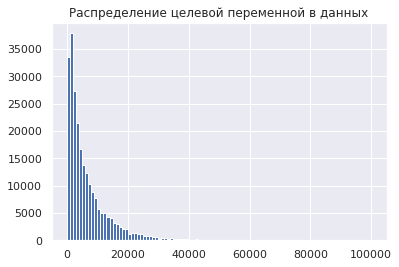

In [ ]:
plt.hist(data['price'].values, bins=100)
plt.title("Распределение целевой переменной в данных")
plt.show()

Распределение не похоже на нормальное, а модель регрессии работает лучше всего, когда целевая переменная распределена нормально. Поэтому имеет смысл заменить таргет на логарифм таргета.

In [ ]:
data['price'] = np.log1p(data['price'])

Text(0.5, 1.0, 'Распределение логарифма целевой переменной в данных')

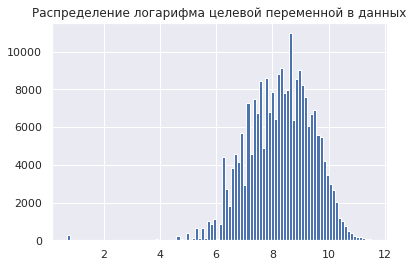

In [ ]:
plt.hist(data['price'].values, bins=100)
plt.title("Распределение логарифма целевой переменной в данных")

Стало лучше. Видим выбросы: очень маленькие значения, которых очень мало. Непохоже, что машина может столько стоить. Значения больше 11 тоже удалим: могут, конечно, быть машины за 7 миллионов, но в нашу общую картинку продажи машин на ebay они не очень вписываются. Удалим их.

In [ ]:
data = data[(data['price'] >= 5.5) & (data['price'] <= 11)]

Text(0.5, 1.0, 'Распределение логарифма целевой переменной в данных')

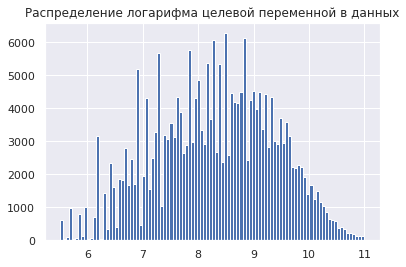

In [ ]:
# новый график

plt.hist(data['price'].values, bins=100)
plt.title("Распределение логарифма целевой переменной в данных")

Проведите исследование данных:

* Проанализируйте тип столбцов

In [ ]:
data.info()

# 5 категориальных признака и 4 числовых

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238575 entries, 0 to 241189
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   brand              238575 non-null  object 
 1   model              238575 non-null  object 
 2   vehicleType        238575 non-null  object 
 3   gearbox            238575 non-null  object 
 4   fuelType           238575 non-null  object 
 5   notRepairedDamage  238575 non-null  object 
 6   powerPS            238575 non-null  int64  
 7   kilometer          238575 non-null  int64  
 8   autoAgeMonths      238575 non-null  int64  
 9   price              238575 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 20.0+ MB


постройте графики зависимости целевой переменной от признака

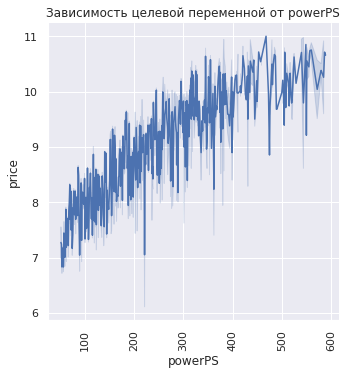

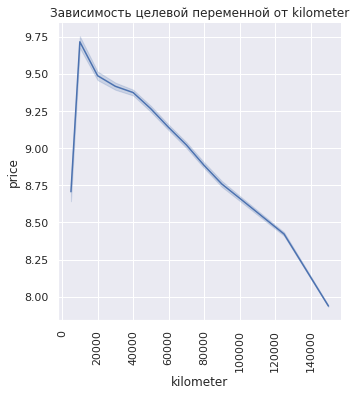

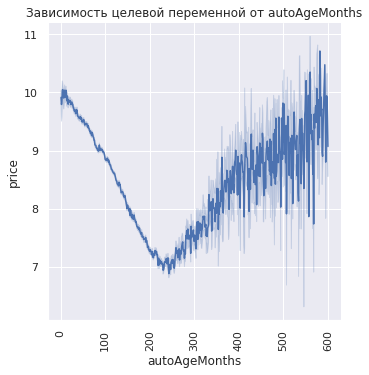

In [ ]:
for feature in numeric:
  sns.relplot(x=feature, y='price', data = data, kind='line')
  plt.title('Зависимость целевой переменной от ' + feature)
  plt.xticks(rotation = 90)

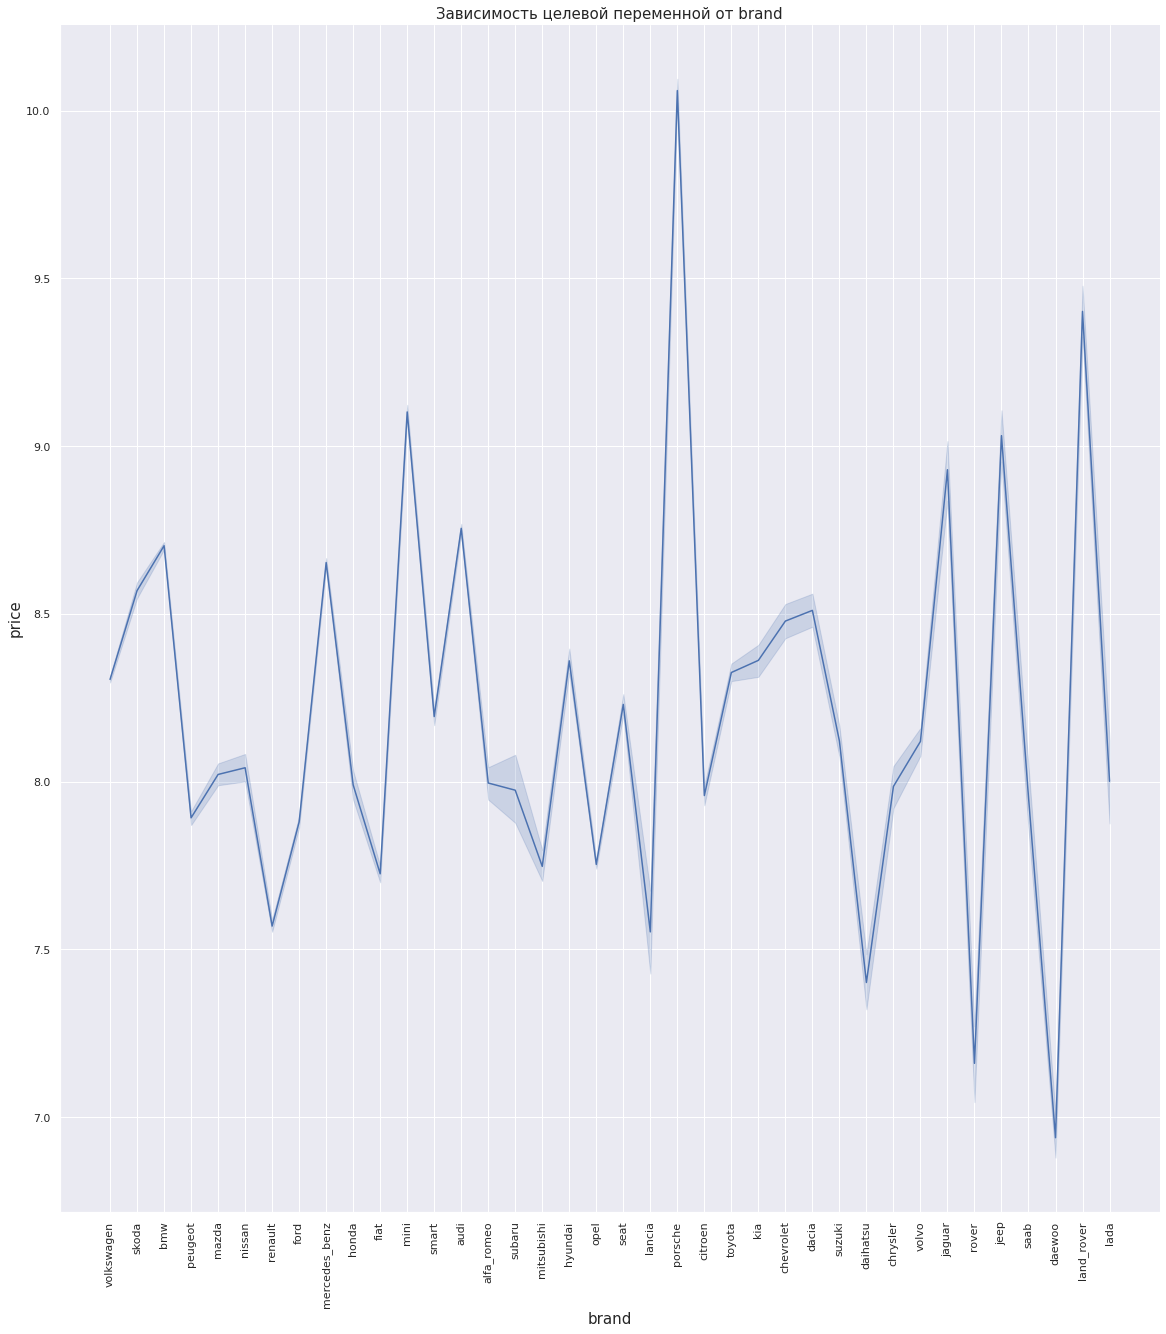

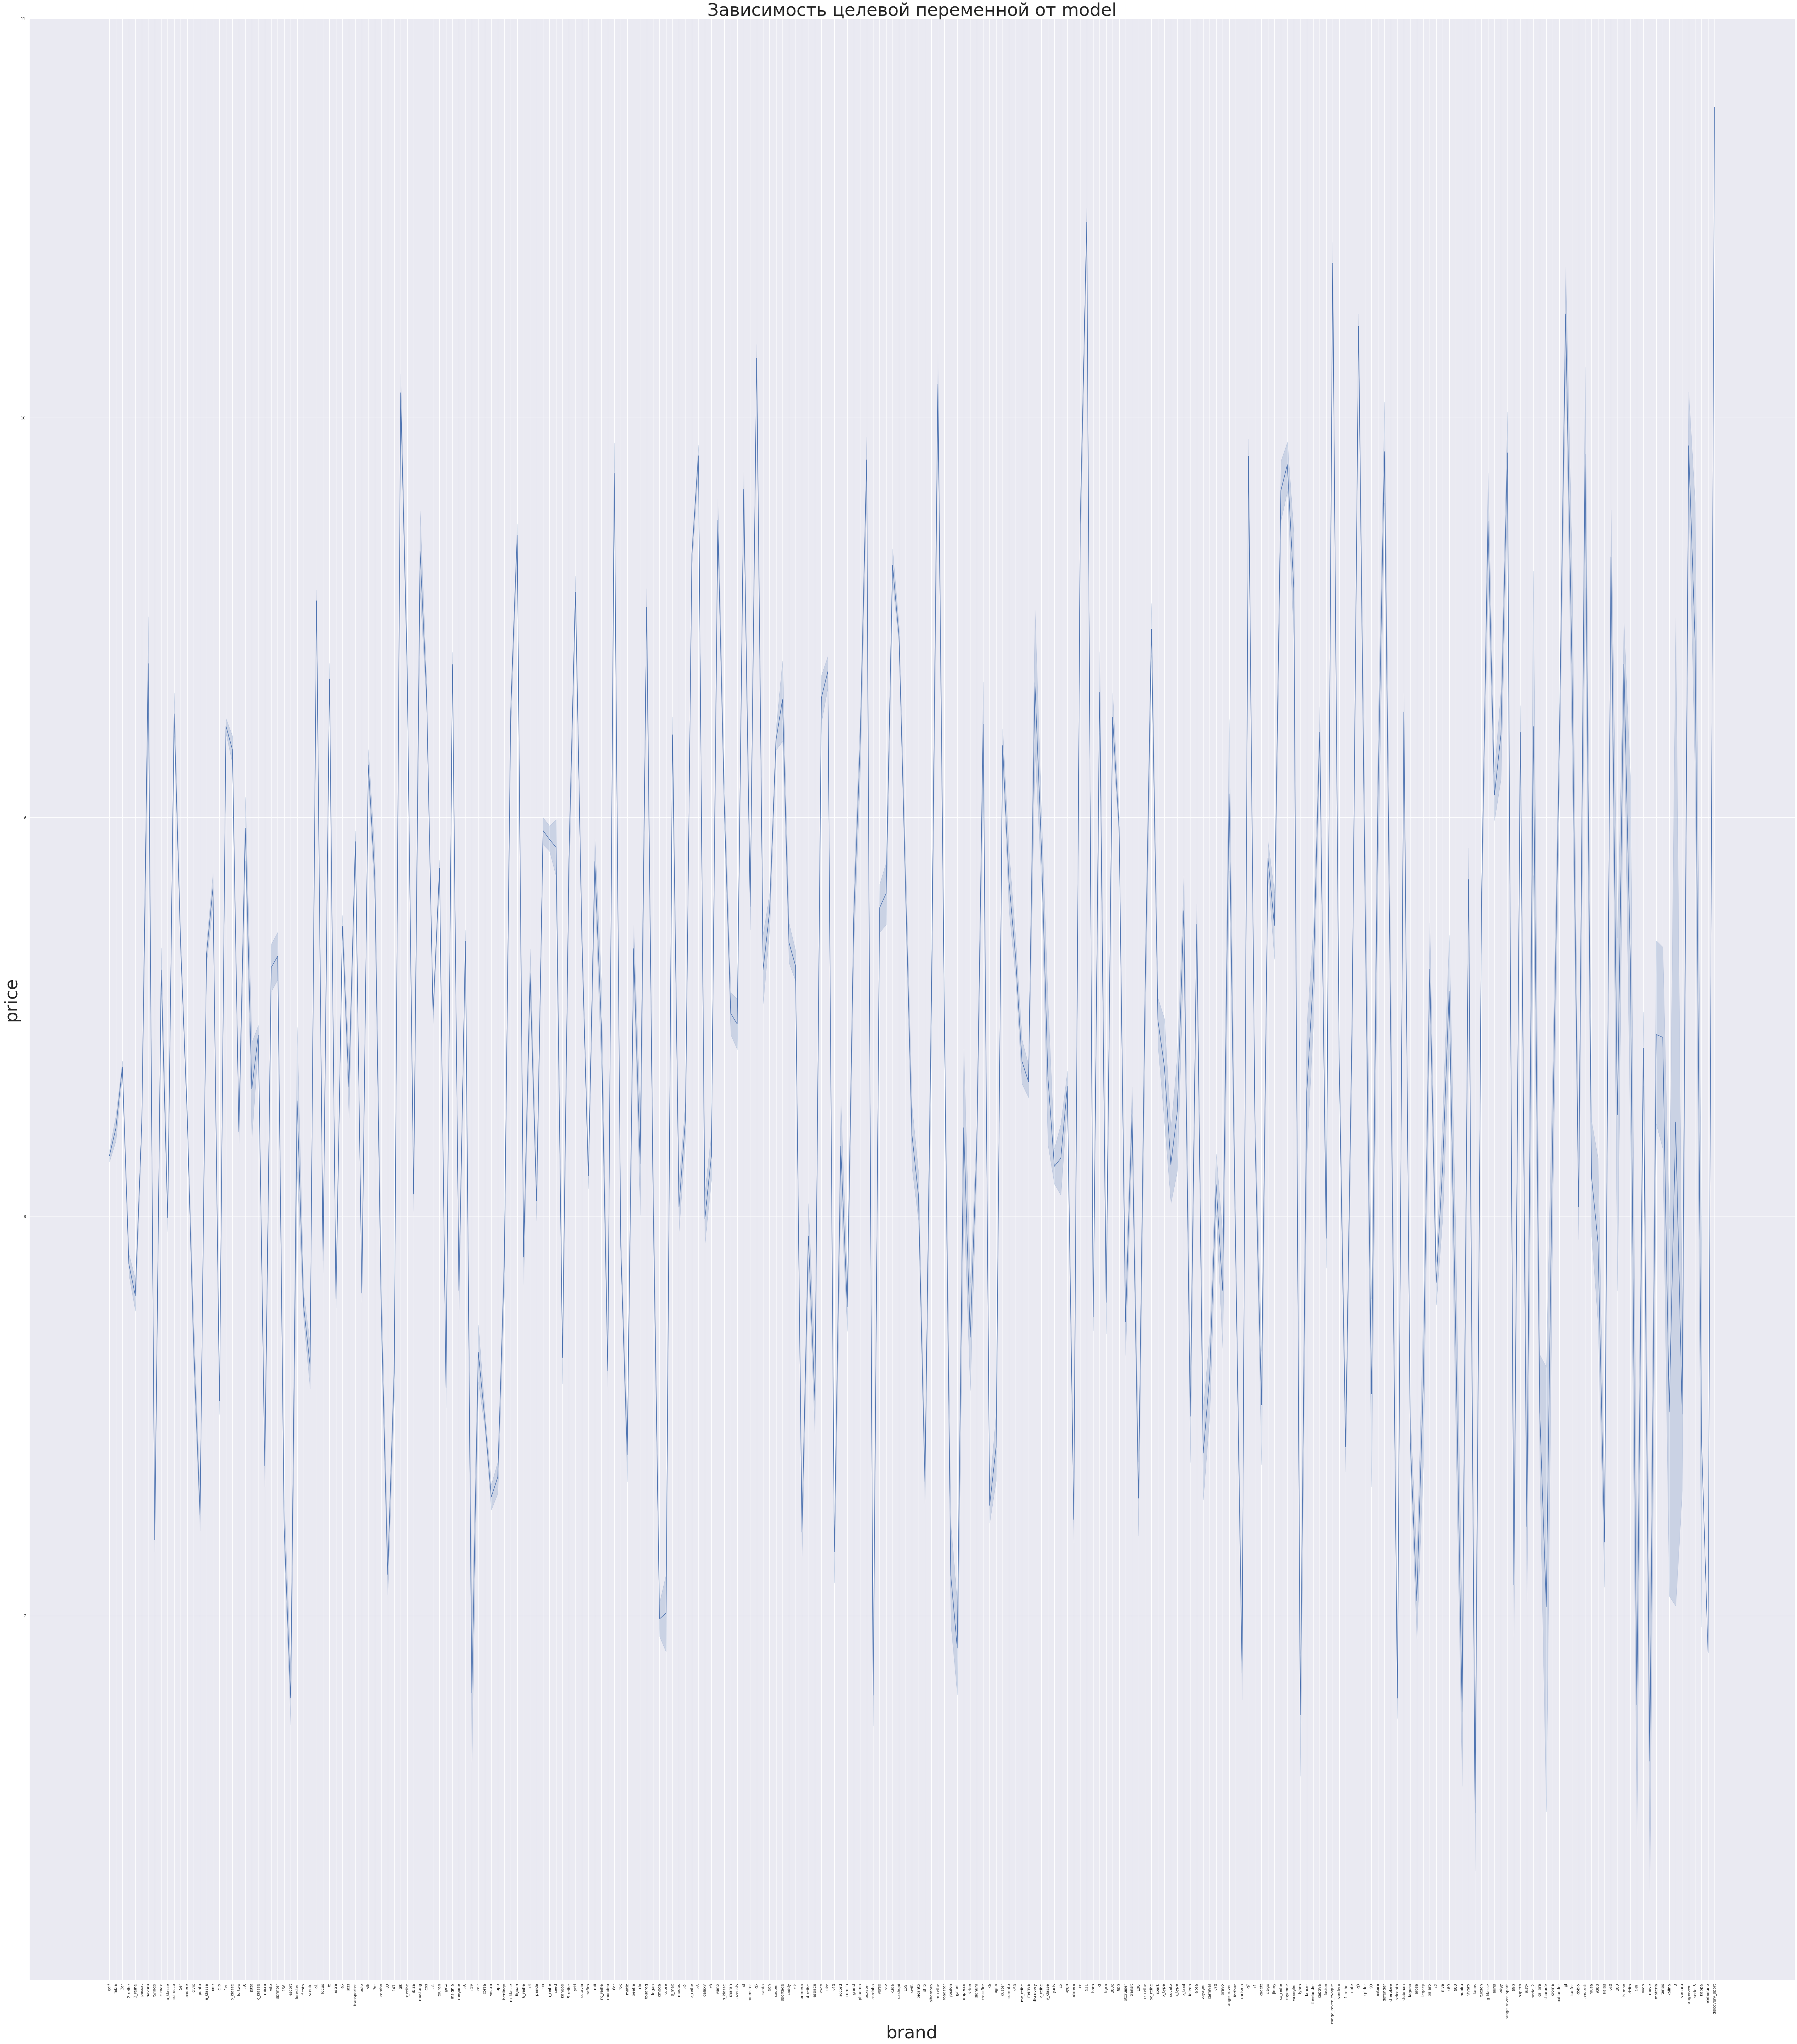

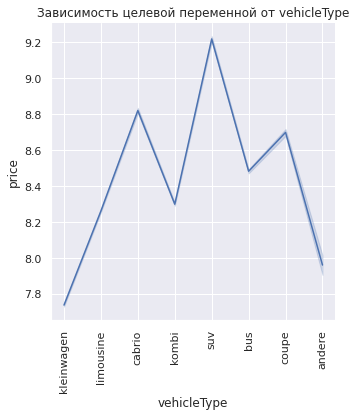

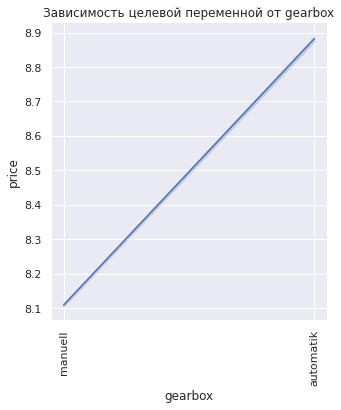

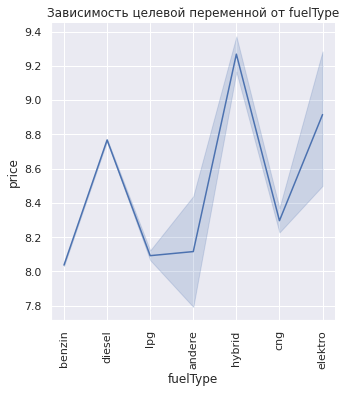

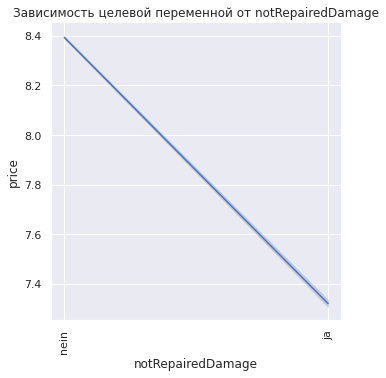

In [ ]:
for feature in categorical:
  ax = sns.relplot(x=feature, y='price', data = data, kind='line')
  if feature == 'model':
    ax.fig.set_size_inches(95, 95)
    plt.title('Зависимость целевой переменной от ' + feature, fontsize=50)
    plt.xlabel('brand', fontsize=50)
    plt.ylabel('price', fontsize=50)
  elif feature == 'brand':
    ax.fig.set_size_inches(20, 20)
    plt.xlabel('brand', fontsize=15)
    plt.ylabel('price', fontsize=15)
    plt.title('Зависимость целевой переменной от ' + feature, fontsize=15)
  else:
    plt.title('Зависимость целевой переменной от ' + feature)
  plt.xticks(rotation = 90)

распределения значений признака

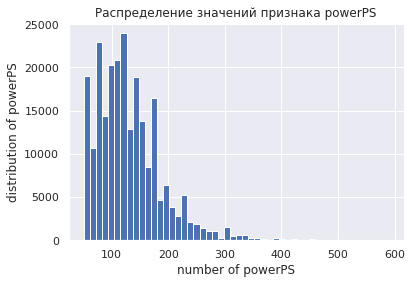

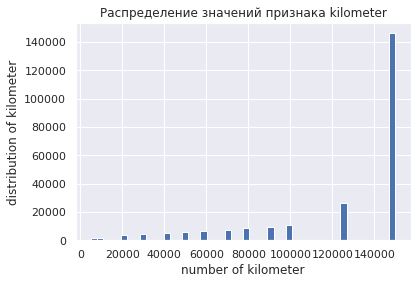

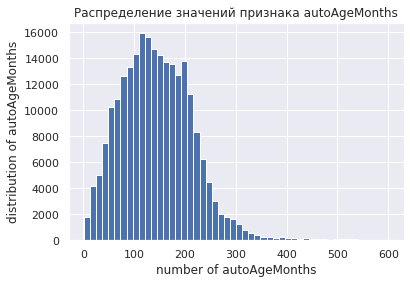

In [ ]:
for feature in numeric:
  plt.title('Распределение значений признака ' + feature)
  plt.hist(data[feature].values, bins=50)
  plt.xlabel('number of ' + feature)
  plt.ylabel('distribution of ' + feature)
  plt.show()

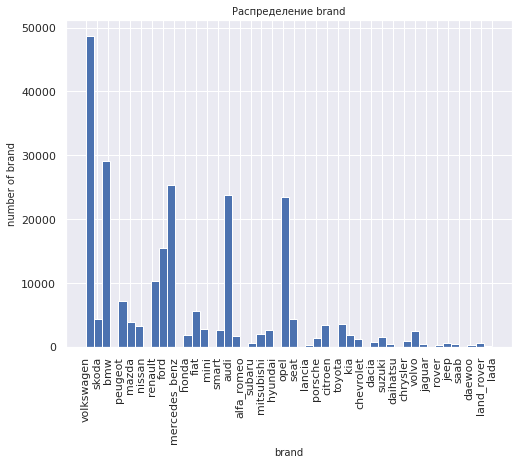

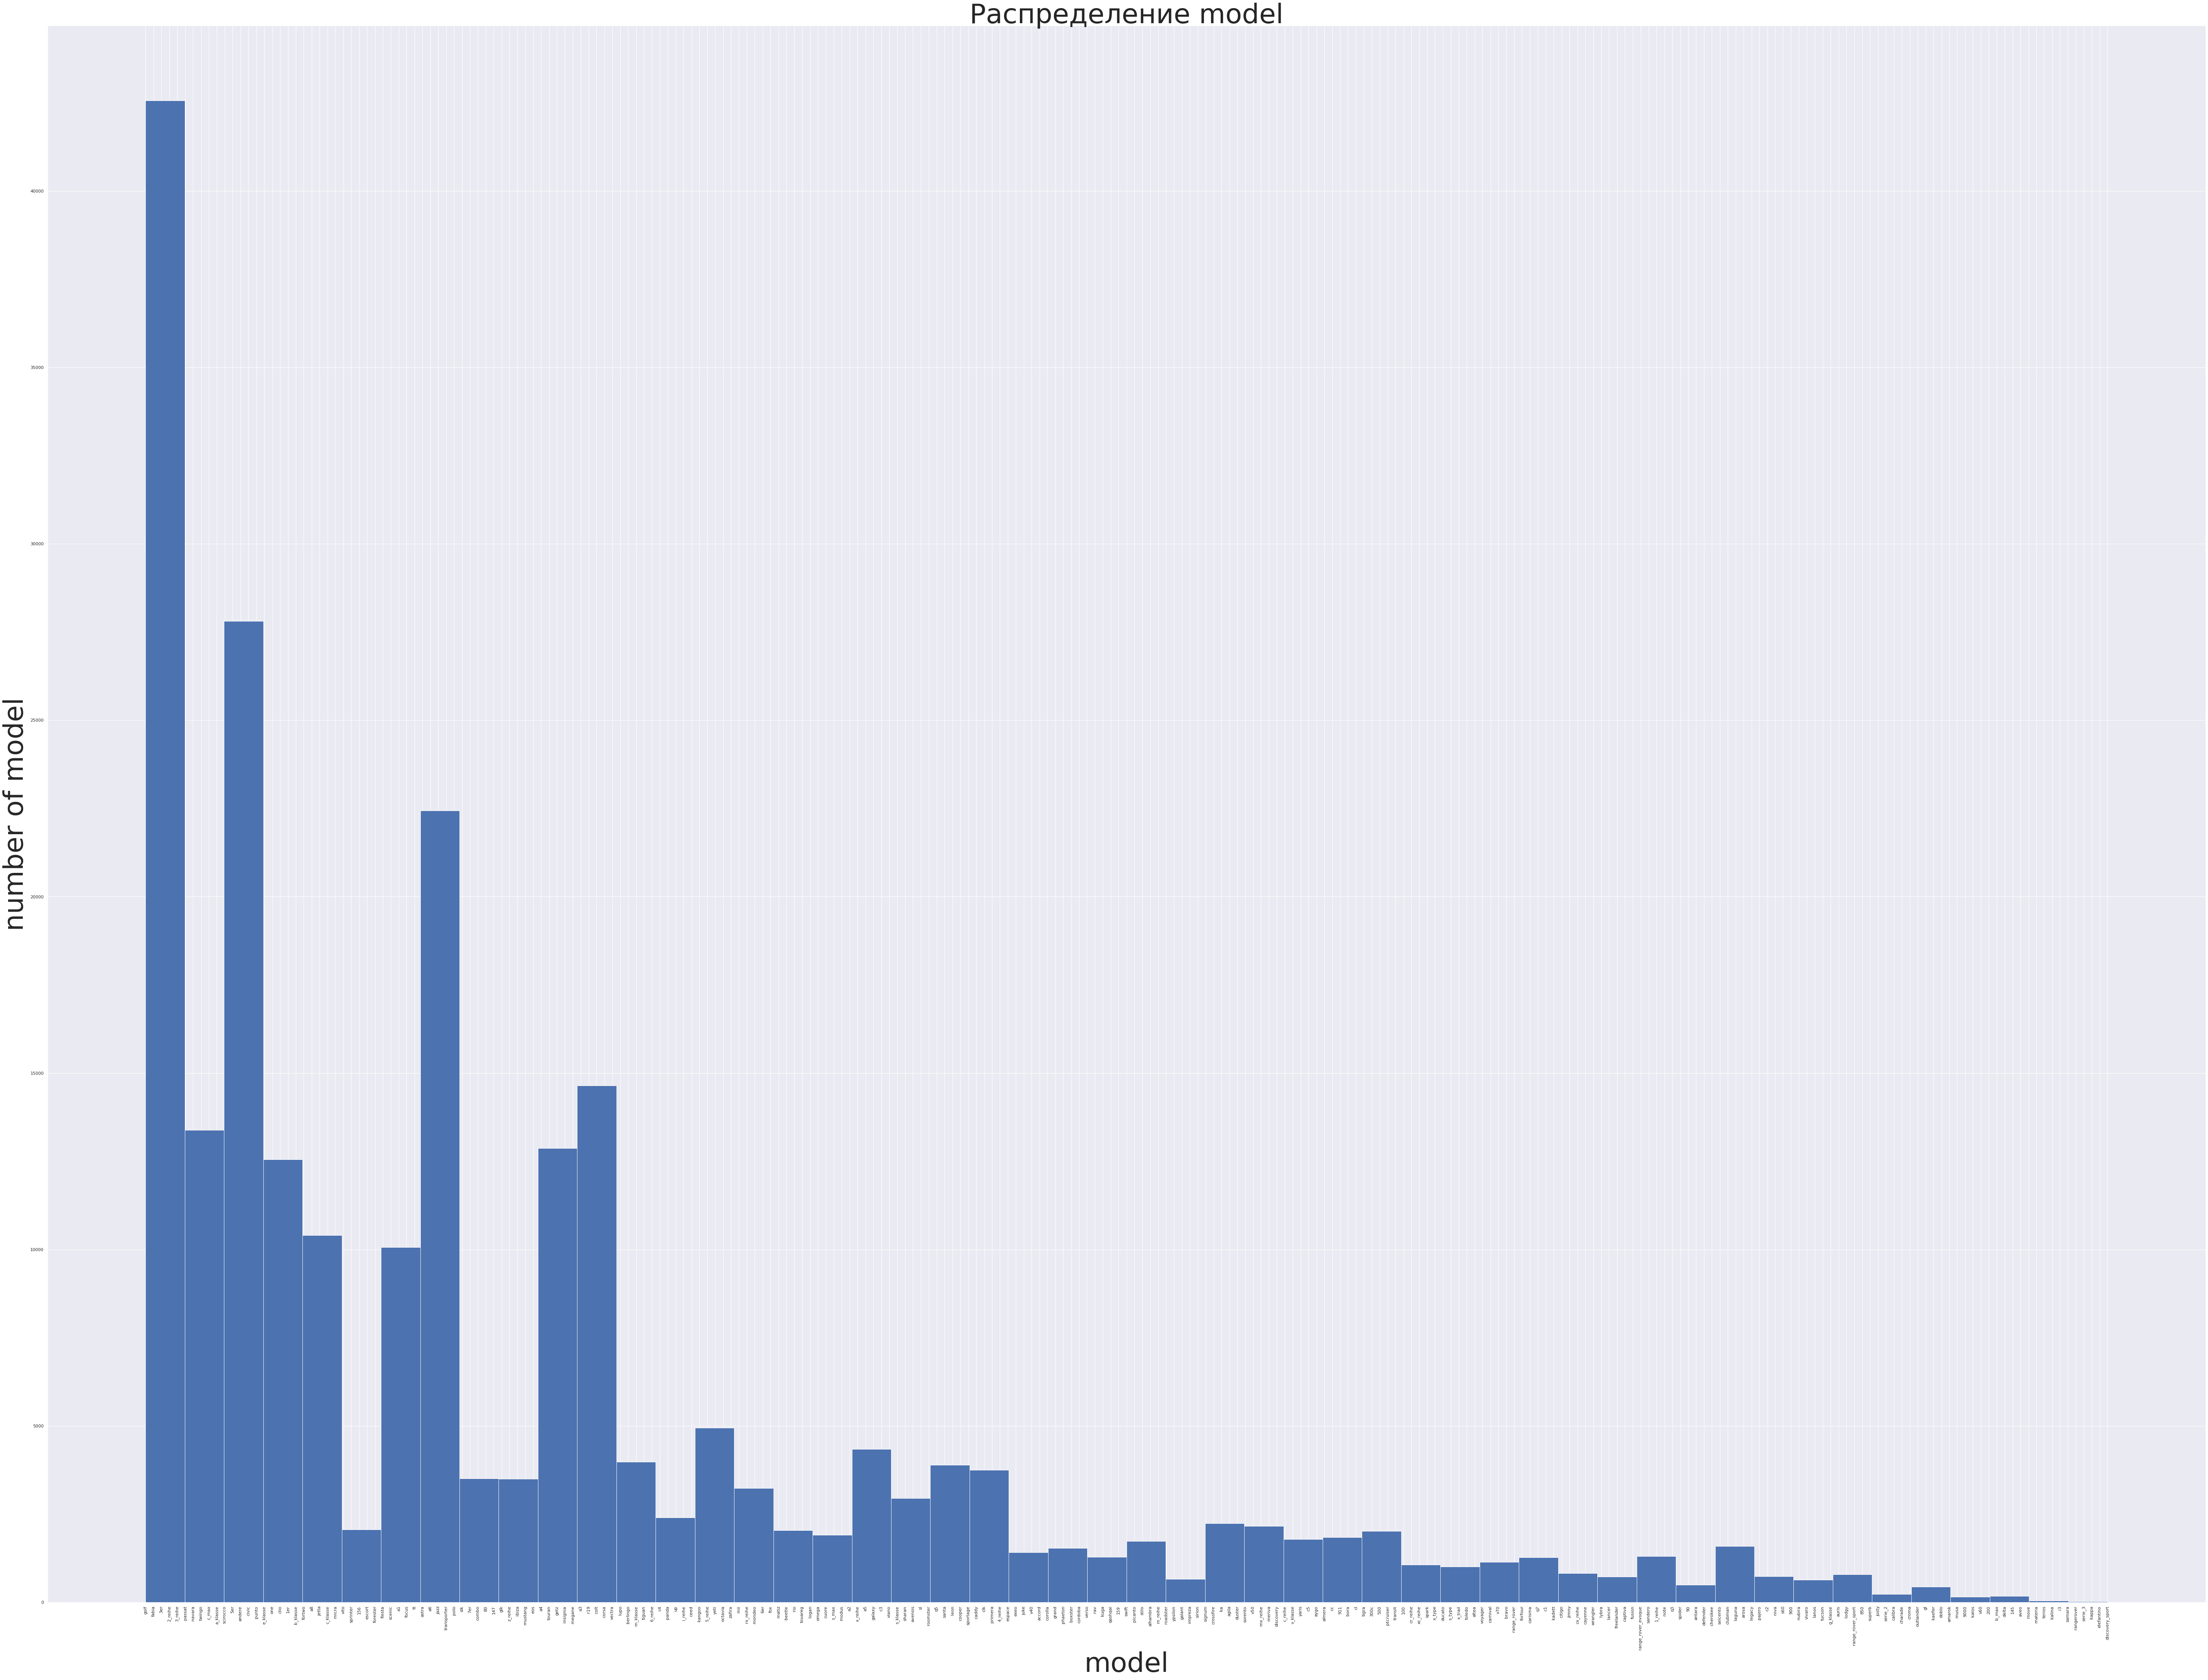

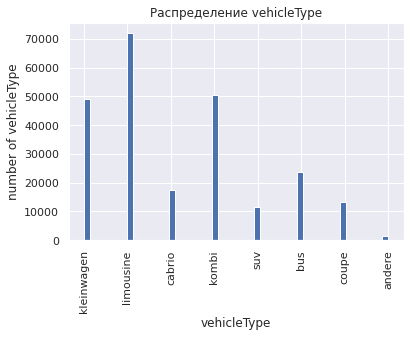

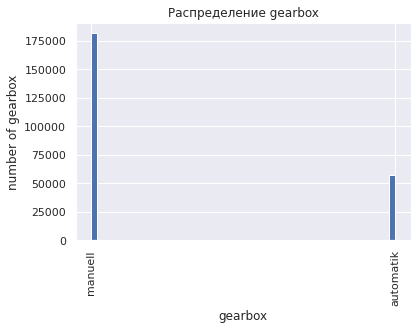

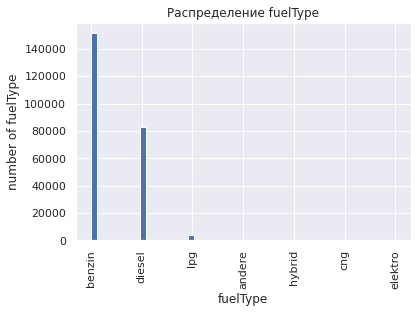

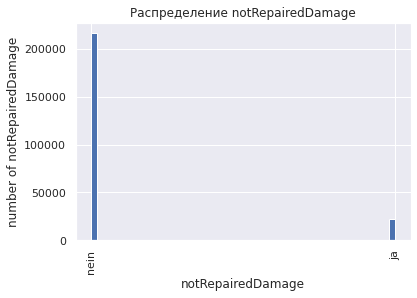

In [ ]:
for feature in categorical:
  if feature == 'model':
    fig = plt.figure(figsize=(100, 75))
    plt.title('Распределение ' + feature, fontsize=70)
    plt.xlabel(feature, fontsize=70)
    plt.ylabel('number of ' + feature, fontsize=70)
  elif feature == 'brand':
    fig = plt.figure(figsize=(8, 6))
    plt.title('Распределение ' + feature, fontsize=10)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('number of ' + feature, fontsize=10)
  else:
    fig = plt.figure(figsize=(6, 4))
    plt.title('Распределение ' + feature)
    plt.xlabel(feature)
    plt.ylabel('number of ' + feature)
  ax = plt.hist(data[feature].values, bins=50)
  plt.xticks(rotation = 90)
  plt.show()

* Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы

1) kilometr интуитивно понятно, почему может быть полезен, и графики это подтверждают: чем больше машиной пользовались, тем меньше ее цена.

2) powerPS --- возможно, ведь общая тенденция, что график возрастает. Но график слишком шатает, поэтому вряд ли мы сможем вытащить из него нужное. Хотя по смыслу выглядит полезным.

3) autoAgeMonths --- да, по смыслу мы тоже понимаем, что чем старше машина, тем меньше ее цена. Хотя после определенного момента машина становится раритетной, и ее цена повышается --- тут график начинает болтать, хотя в целом цена повышается.

По категориальным признакам тоже, кажется, по всем можно будет сделать какие-то выводы. Возможно, не все категории нам полезны и для нас различимы между собой, но некоторые дадут много информации.

In [ ]:
# видно, что в пробеге в начале что-то не так

data = data[data['kilometer'] >= 20000]

In [ ]:
data['powerPS'].max()

# погуглила --- допустимое значение, хотя слишком большие и выглядят выбросами. 
# видимо, просто очень редкие

589

In [ ]:
# autoagemonth кое-где излишне трясет. удалим верхние 5%

data = data[data['autoAgeMonths'] > np.quantile(data['autoAgeMonths'], 0.05)]

* Подумайте, какие трансформации признаков из известных вам будет уместно применить

In [ ]:
# в notRepairedDamage лежат значения 0, 1, называнные неудобными nein и ja. Переименуем

data.loc[data['notRepairedDamage'] == 'nein', 'notRepairedDamage'] = 0
data.loc[data['notRepairedDamage'] == 'ja', 'notRepairedDamage'] = 1

In [ ]:
data['notRepairedDamage']

0         0
1         0
2         1
3         0
4         0
         ..
241184    0
241185    0
241186    1
241187    0
241188    0
Name: notRepairedDamage, Length: 223391, dtype: object

In [ ]:
# получилось типа object. сделаем числовым

data['notRepairedDamage'] = pd.to_numeric(data['notRepairedDamage'], downcast='float').astype(int)

Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.

Это мы уже выше сделали. + мы уже сделали трансформацию для notRepairedDamage, так что все обработали.

In [ ]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['price']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [ ]:
y_train = y_train.values
y_valid = y_valid.values
y_test = y_test.values

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import math

In [ ]:
descent_names = ['full', 'stochastic', 'momentum', 'adam']

descent_config = {
    'descent_name': None,
    'kwargs': {'lambda_': 0, 'dimension': x_train.shape[1]}
}

# перебор по логарифмической сетке
lambdas = np.logspace(start=-3, stop=-1, num=40)

# лучшие лямбды
best_lambdas_without = {'full': None,
                        'stochastic': None,
                        'momentum': None,
                        'adam': None}

# лучшие мсе на валидационной выборке
best_mse_without = {'full': math.inf,
       'stochastic': math.inf,
       'momentum': math.inf,
       'adam': math.inf
}

for descent in descent_names:
    descent_config['descent_name'] = descent

    for lambda_ in lambdas:
        descent_config['kwargs']['lambda_'] = lambda_

        reg = LinearRegression(descent_config=descent_config)
        reg.fit(x_train, y_train)
        loss = reg.calc_loss(x_valid, y_valid)

        if loss < best_mse_without[descent]:
            best_mse_without[descent] = loss
            best_lambdas_without[descent] = lambda_

In [ ]:
# теперь посчитаем все для лучших лямбд

loss_story_without = {}  # для следующего задания будем хранить тут loss + отсюда знаем число итераций до сходимости

for descent in descent_names:
  descent_config['descent_name'] = descent
  descent_config['kwargs']['lambda_'] = best_lambdas_without[descent]

  # обучаем регрессию с лучшей лямбдой
  reg = LinearRegression(descent_config=descent_config)
  reg.fit(x_train, y_train)

  # предсказания на трейне и на тесте
  train_res = reg.predict(x_train)
  test_res = reg.predict(x_test)

  print('Тип градиентного спуска:', descent)
  print('Лучшая лямбда:', best_lambdas_without[descent])
  print('MSE train =', mean_squared_error(y_train, train_res))
  print('MSE test =', mean_squared_error(y_test, test_res))
  print('R2, train =', r2_score(y_train, train_res))
  print('R2, test =', r2_score(y_test, test_res))

  loss_story_without[descent] = reg.loss_history
  # вычитаем 1, т.к. в loss_story лежат loss до каждого шага + loss после всех шагов,
  # т.е. для последнего шага лежит два lossа: до него и после
  print('Число итераций до сходимости:', len(loss_story_without[descent]) - 1)
  print("***")

Тип градиентного спуска: full
Лучшая лямбда: 0.1
MSE train = 0.6395972268909615
MSE test = 0.6512202352907809
R2, train = 0.4074336405005303
R2, test = 0.3967048168110543
Число итераций до сходимости: 27
***
Тип градиентного спуска: stochastic
Лучшая лямбда: 0.1
MSE train = 0.6346068836047519
MSE test = 0.6514178861739803
R2, train = 0.4120570338321997
R2, test = 0.39652171158900296
Число итераций до сходимости: 34
***
Тип градиентного спуска: momentum
Лучшая лямбда: 0.1
MSE train = 0.31995914073878806
MSE test = 0.3222999095081744
R2, train = 0.7035680968509193
R2, test = 0.7014190094051775
Число итераций до сходимости: 77
***
Тип градиентного спуска: adam
Лучшая лямбда: 0.1
MSE train = 0.2516447138907858
MSE test = 0.2556542712678801
R2, train = 0.7668592268256194
R2, test = 0.7631600155226694
Число итераций до сходимости: 297
***


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

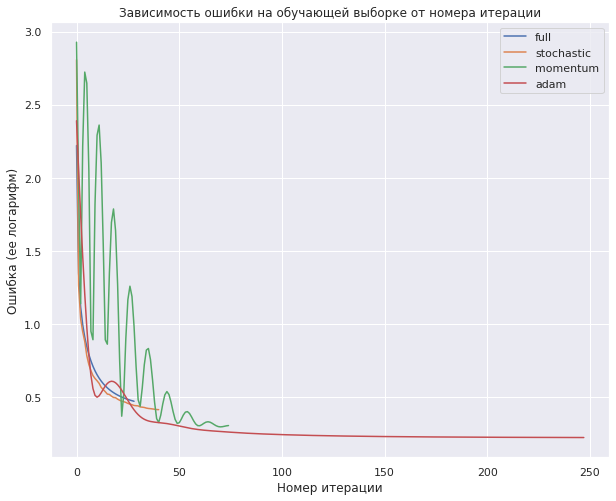

In [ ]:
plt.figure(figsize=(10, 8))

for descent in loss_story:
  plt.plot(np.log1p(loss_story[descent]))  # логарифмируем, чтобы покрупнее было

plt.legend(descent_names)
plt.title('Зависимость ошибки на обучающей выборке от номера итерации')
plt.xlabel('Номер итерации')
plt.ylabel('Ошибка (ее логарифм)')
plt.show()

Дольше всех сходится Adam (но и MSE и R2 дает лучшее на обучении и тесте), быстрее всех по числу итераций --- полный градиентный спуск. Полный градиентный спуск сходится плавнее всех, без скачков (что мы знаем еще и из принципа работы методов градиентного спуска). Стохастический сходится чуть медленнее полного, но результат дает даже чуть лучше. Больше всего колеблется momentum. Momentum сходится медленнее полного и стохастического градиентного спуска. Но все метрики дает лучше.

Получилось, что медленнее всех сходится Adam, но значения метрик дает лучшие. Стохастический спуск чуть медленнее полного, но значения метрик дал лучше. Momentum получился среднячком: и сходится не так быстро, как полный/стохастический спуск, но быстрее, чем Adam, но и результат дает не лучше, чем Adam (хотя лучше, чем стохастический/градиентный спуск). Т.е. нам лучше всего использовать Adam, хотя и придется за качество заплатить ожиданием.



## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [ ]:
import time

In [ ]:
batch_sizes = np.arange(5, 500, 10)

# тут для каждого размера батча будут храниться среднее время и число итераций
times = []
nums_it = []

for batch_size in batch_sizes:
    # тут мы будем хранить время и число итераций для каждого из запусков
    i_time = []
    num_it = []

    for i in range(10):
        # задаем для регрессии
        descent_config = {
            'descent_name': 'stochastic',
            'kwargs': {
                'lambda_': best_lambdas['stochastic'],
                'dimension': x_train.shape[1],
                'batch_size': batch_size
            }
        }

        # фиксируем время начала
        start = time.time()

        # обучаем регрессию
        reg = LinearRegression(descent_config=descent_config)
        reg.fit(x_train, y_train)

        # время конца
        end = time.time()

        # добавляем длительность в массив с результатами
        i_time.append(end - start)
        # число итераций. -1, т.к. мы храним до каждого шага и еще и после последнего шага
        num_it.append(len(reg.loss_history) - 1)

    times.append(np.mean(i_time))
    nums_it.append(np.mean(num_it))

In [ ]:
batch_sizes = np.arange(5, 500, 10)

# тут для каждого размера батча будут храниться среднее время и число итераций
times = []
nums_it = []

for batch_size in batch_sizes:
    # тут мы будем хранить время и число итераций для каждого из запусков
    i_time = []
    num_it = []

    for i in range(10):
        # задаем для регрессии
        descent_config = {
            'descent_name': 'stochastic',
            'kwargs': {
                'lambda_': best_lambdas['stochastic'],
                'dimension': x_train.shape[1],
                'batch_size': batch_size
            }
        }

        # фиксируем время начала
        start = time.time()

        # обучаем регрессию
        reg = LinearRegression(descent_config=descent_config)
        reg.fit(x_train, y_train)

        # время конца
        end = time.time()

        # добавляем длительность в массив с результатами
        i_time.append(end - start)
        # число итераций. -1, т.к. мы храним до каждого шага и еще и после последнего шага
        num_it.append(len(reg.loss_history) - 1)

    times.append(np.mean(i_time))
    nums_it.append(np.mean(num_it))

Text(0, 0.5, 'Среднее количество шагов до сходимости')

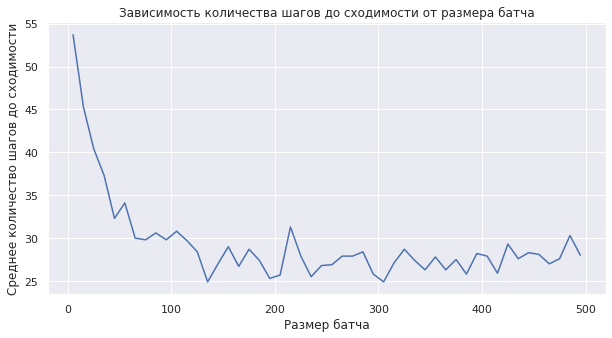

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(batch_sizes, nums_it)
plt.title('Зависимость количества шагов до сходимости от размера батча')
plt.xlabel('Размер батча')
plt.ylabel('Среднее количество шагов до сходимости')

Text(0, 0.5, 'Среднее время до сходимости')

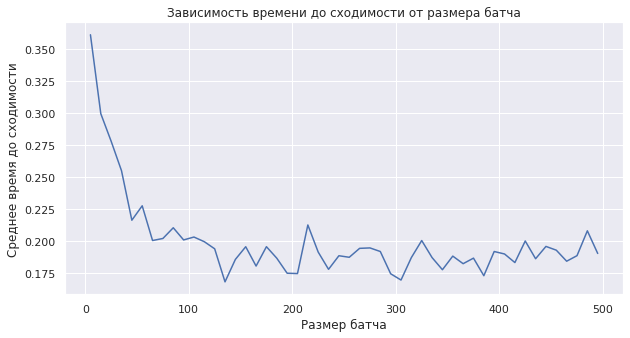

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(batch_sizes, times)
plt.title('Зависимость времени до сходимости от размера батча')
plt.xlabel('Размер батча')
plt.ylabel('Среднее время до сходимости')

Видно, что на размере батча где-то около 230 среднее время сходимости и количество итераций перестают падать (графики колеблются, но не на критичную величину). Меньше 100 брать нет смысла, т.к. из-за маленького числа элементов в батче не будет точности. А сильно больше 200 тоже, иначе пропадает преимущество перед полным градиентным спуском в скорости сходимости. На графиках видим, что с сильным увеличением размера батча растут время работы и число шагов. Так что число шагов около 230 или чуть больше для нас идеально --- лучше значений числа итераций и времени сходимости уже не особо не будет, но и преимущество по затратности (вычисление градиентов для каждого элемента из батча/из всей тренировочной выборки) по сравнению с полным спуском мы получаем. Но смотреть нужно для каждой задачи отдельно.

Графики похожи, ведь чем больше итераций мы делаем, тем больше времени нам нужно.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/29933/run-report/56274632/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [ ]:
# ищем лучшие лямбды и мю

descent_names = ['full', 'stochastic', 'momentum', 'adam']

descent_config = {
    'descent_name': None,
    'regularized': True,
    'kwargs': {'lambda_': 0, 'dimension': x_train.shape[1]}
}

# перебор по логарифмической сетке
lambdas = np.logspace(start=-3, stop=-1, num=10)
mus = np.logspace(start=-3, stop=-1, num=10)

# лучшие лямбды
best_lambdas_reg = {'full': None,
                'stochastic': None,
                'momentum': None,
                'adam': None}

# лучшие мю
best_mu_reg = {'full': None,
           'stochastic': None,
           'momentum': None,
           'adam': None}

# лучшие мсе на валидационной выборке
best_mse_reg = {'full': math.inf,
       'stochastic': math.inf,
       'momentum': math.inf,
       'adam': math.inf
}

for descent in descent_names:
    descent_config['descent_name'] = descent

    # перебор по лямбдам
    for lambda_ in lambdas:
        descent_config['kwargs']['lambda_'] = lambda_

        # перебор по мю
        for mu in mus:
            descent_config['kwargs']['mu'] = mu
            
            # обучаем регрессию
            reg = LinearRegression(descent_config=descent_config)
            reg.fit(x_train, y_train)
            
            loss = reg.calc_loss(x_valid, y_valid)

            # обновляем лучшие показатели, если нашли лучше
            if loss < best_mse_reg[descent]:
              best_mse_reg[descent] = loss
              best_lambdas_reg[descent] = lambda_
              best_mu_reg[descent] = mu

In [ ]:
# теперь посчитаем все для лучших лямбд

loss_story_reg = {}  # для будущего будем хранить тут loss + отсюда знаем число итераций до сходимости

for descent in descent_names:
  descent_config['descent_name'] = descent
  descent_config['kwargs']['lambda_'] = best_lambdas_reg[descent]
  descent_config['kwargs']['mu'] = best_mu_reg[descent]

  # обучаем регрессию с лучшими лямбдой и мю
  reg = LinearRegression(descent_config=descent_config)
  reg.fit(x_train, y_train)

  # предсказания на трейне и на тесте
  train_res = reg.predict(x_train)
  test_res = reg.predict(x_test)

  # записываем loss до шага и после всех шагов
  loss_story_reg[descent] = reg.loss_history

  print('Тип градиентного спуска:', descent)
  print('Лучшая лямбда:', best_lambdas_reg[descent])
  print('Лучшая mu', best_mu_reg[descent])
  print('MSE train =', mean_squared_error(y_train, train_res))
  print('MSE test =', mean_squared_error(y_test, test_res))
  print('R2, train =', r2_score(y_train, train_res))
  print('R2, test =', r2_score(y_test, test_res))
  # вычитаем 1, т.к. в loss_story лежат loss до каждого шага + loss после всех шагов,
  # т.е. для последнего шага лежит два lossа: до него и после
  print('Число итераций до сходимости:', len(loss_story_reg[descent]) - 1)
  print("***")

Тип градиентного спуска: full
Лучшая лямбда: 0.1
Лучшая mu 0.1
MSE train = 0.5420912853698944
MSE test = 0.54263803767272
R2, train = 0.49776977450405857
R2, test = 0.4972961578860077
Число итераций до сходимости: 90
***
Тип градиентного спуска: stochastic
Лучшая лямбда: 0.1
Лучшая mu 0.1
MSE train = 0.5053611438459585
MSE test = 0.5138006096956894
R2, train = 0.5317990750257906
R2, test = 0.5240113618236317
Число итераций до сходимости: 95
***
Тип градиентного спуска: momentum
Лучшая лямбда: 0.1
Лучшая mu 0.021544346900318832
MSE train = 0.2865824977812922
MSE test = 0.2906687970681355
R2, train = 0.7344904882843153
R2, test = 0.7307223030374195
Число итераций до сходимости: 191
***
Тип градиентного спуска: adam
Лучшая лямбда: 0.1
Лучшая mu 0.001
MSE train = 0.27229831276636923
MSE test = 0.2765027698940788
R2, train = 0.7477243285150716
R2, test = 0.7438458140954198
Число итераций до сходимости: 300
***


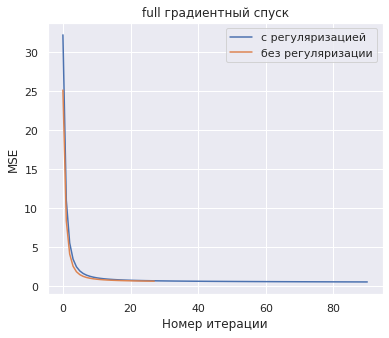

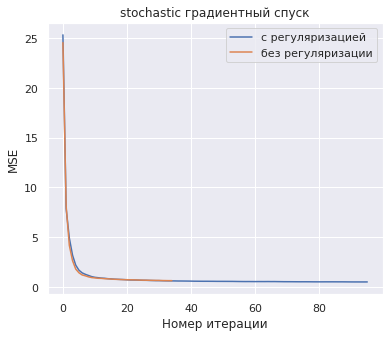

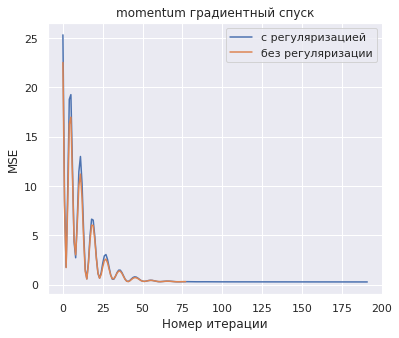

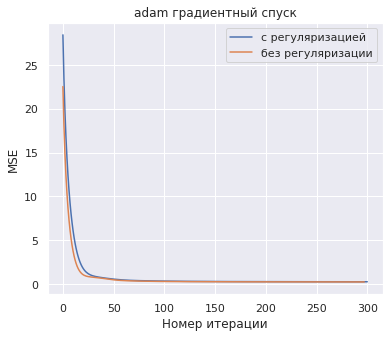

In [ ]:
for descent in descent_names:
  plt.figure(figsize=(6, 5))

  plt.title(str(descent) + ' градиентный спуск')
  plt.plot(loss_story_reg[descent], label='с регуляризацией')
  plt.plot(loss_story_without[descent], label='без регуляризации')

  plt.legend()
  plt.xlabel('Номер итерации')
  plt.ylabel('MSE')
  plt.show()

По графикам видим, что на общих итерациях MSE немного хуже. Возможно, наша модель несклонна к переобучению, поэтому дополнительный пинок не переобучаться не делает ей лучше, а наоборот ухудшает ее результаты. По результатам задания 5 (результаты без регуляризации) и графикам видим, что число итераций увеличилось: опять-таки, мы заставляем модель идти не по своему пути, а как-то еще менять веса, как этого не хотелось, и поэтому к результату приходим медленнее. По табличным результатам в задании 5 видим, что в конечном итоге качество немного улучшилось: видимо, раз число итераций увеличилось, и теперь модель успевает прийти к лучшему результату.

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регресии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

\begin{align*}
Q(w) = \frac{1}{l} \sum^{l}_{i = 1} L(y_i, a_i) \\ 
\frac{\partial L}{\partial w} = (log(cosh(Xw - y)))' = \frac{1}{cosh(Xw - y)} (cosh(Xw - y))' = \frac{1}{cosh(Xw - y)}sinh(Xw - y)(Xw - y)' = tanh(Xw - y)X \Rightarrow dL = tanh(Xw - y)Xdw \Rightarrow \nabla_w L = X^T tanh(Xw - y) \\ \Rightarrow \nabla_w Q = \frac{1}{\ell} \sum_{i = 1}^{\ell} X^T tanh(a_i - y_i).
\end{align*}

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

In [ ]:
from descents import LossFunction

descent_names = ['full', 'stochastic', 'momentum', 'adam']

descent_config = {
    'descent_name': None,
    'kwargs': {'lambda_': 0, 'dimension': x_train.shape[1]}
}

# перебор по логарифмической сетке
lambdas = np.logspace(start=-3, stop=-1, num=40)

# лучшие лямбды
best_lambdas_cosh = {'full': None,
                        'stochastic': None,
                        'momentum': None,
                        'adam': None}

# лучшие мсе на валидационной выборке
best_mse_cosh = {'full': math.inf,
       'stochastic': math.inf,
       'momentum': math.inf,
       'adam': math.inf
}

for descent in descent_names:
    descent_config['descent_name'] = descent

    for lambda_ in lambdas:
        descent_config['kwargs']['lambda_'] = lambda_

        reg = LinearRegression(descent_config=descent_config)
        reg.fit(x_train, y_train)
        loss = reg.calc_loss(x_valid, y_valid)

        if loss < best_mse_cosh[descent]:
            best_mse_cosh[descent] = loss
            best_lambdas_cosh[descent] = lambda_

In [ ]:
# теперь посчитаем все для лучших лямбд

loss_story_cosh = {}  # для следующего задания будем хранить тут loss + отсюда знаем число итераций до сходимости

for descent in descent_names:
  descent_config['descent_name'] = descent
  descent_config['kwargs']['lambda_'] = best_lambdas_cosh[descent]

  # обучаем регрессию с лучшей лямбдой
  reg = LinearRegression(descent_config=descent_config)
  reg.fit(x_train, y_train)

  # предсказания на трейне и на тесте
  train_res = reg.predict(x_train)
  test_res = reg.predict(x_test)

  print('Тип градиентного спуска:', descent)
  print('Лучшая лямбда:', best_lambdas_cosh[descent])
  print('MSE train =', mean_squared_error(y_train, train_res))
  print('MSE test =', mean_squared_error(y_test, test_res))
  print('R2, train =', r2_score(y_train, train_res))
  print('R2, test =', r2_score(y_test, test_res))

  loss_story_cosh[descent] = reg.loss_history
  # вычитаем 1, т.к. в loss_story лежат loss до каждого шага + loss после всех шагов,
  # т.е. для последнего шага лежит два lossа: до него и после
  print('Число итераций до сходимости:', len(loss_story_cosh[descent]) - 1)
  print("***")

Тип градиентного спуска: full
Лучшая лямбда: 0.08886238162743403
MSE train = 0.6067546003021578
MSE test = 0.6180692157386048
R2, train = 0.43786128286028325
R2, test = 0.4274161634950223
Число итераций до сходимости: 27
***
Тип градиентного спуска: stochastic
Лучшая лямбда: 0.1
MSE train = 0.5460098514912255
MSE test = 0.5501650278111264
R2, train = 0.4941393484119032
R2, test = 0.49032309923652695
Число итераций до сходимости: 37
***
Тип градиентного спуска: momentum
Лучшая лямбда: 0.1
MSE train = 0.3285323023496653
MSE test = 0.33211719847852333
R2, train = 0.6956253370146197
R2, test = 0.6923242011869704
Число итераций до сходимости: 77
***
Тип градиентного спуска: adam
Лучшая лямбда: 0.08886238162743403
MSE train = 0.2723924705496681
MSE test = 0.27608949560420604
R2, train = 0.7476370943424985
R2, test = 0.7442286744165594
Число итераций до сходимости: 300
***


Для наглядности нарисуем графики. По графикам все неоднозначно: где-то cosh лучше, где-то значительно хуже.  По табличным результам итоговые значения тоже: где-то MSE улучшилось, где-то ухудшилось. Так что нужно выбирать в зависимости от того, какой вариацией градиентного спуска мы пользуемся. R^2 у logcosh лучше, но незначительно. Число итераций или такое же, или незначительно больше (37 logcosh против 34 mse и 300 против 297). Кажется, что нам значительных улучшений использование logcosh не принесло, лучшим по качеству для нас остался Adam, хоть итераций нужно и значительно больше, чем в других реализациях градиентного спуска.

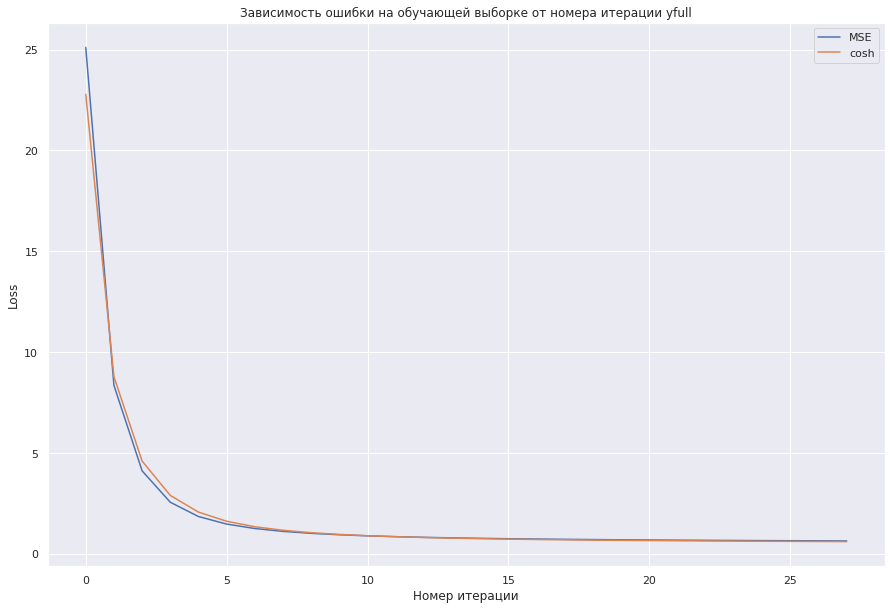

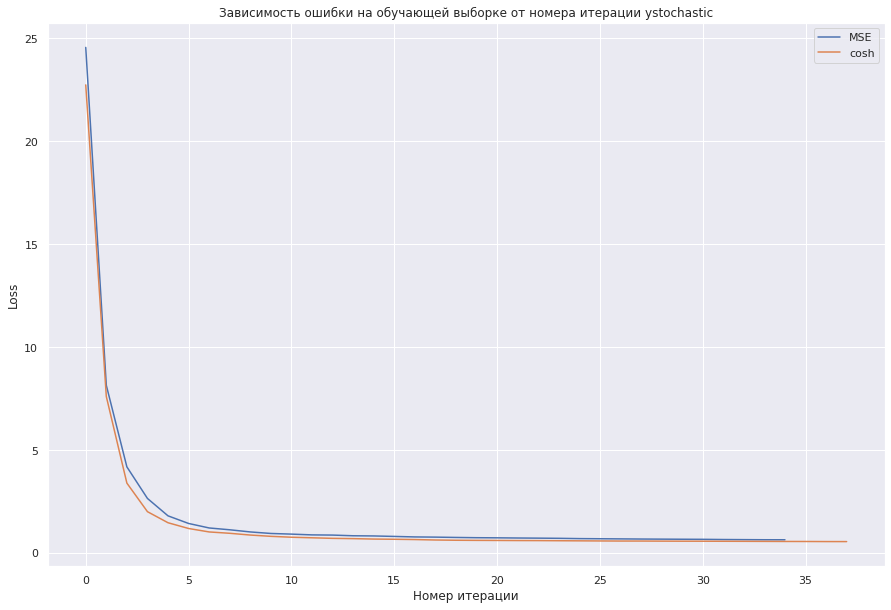

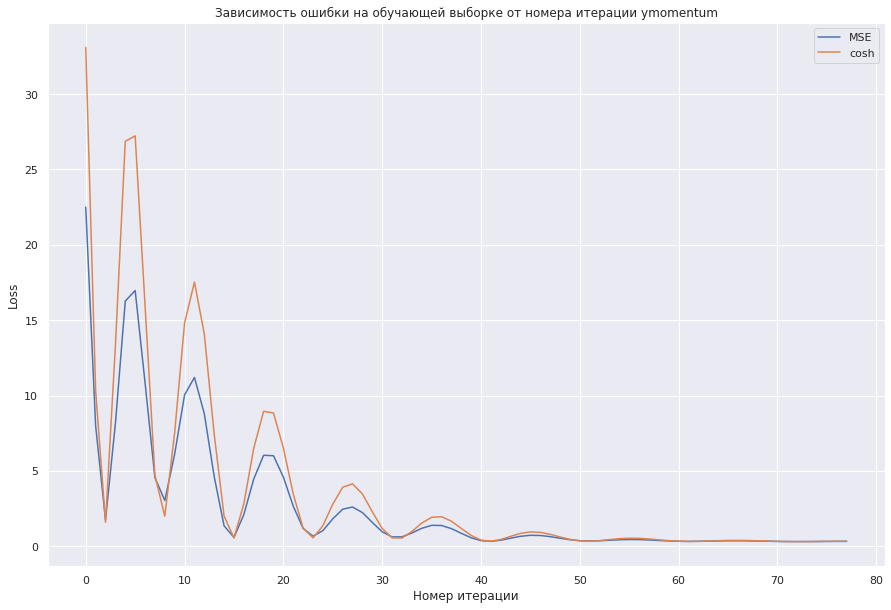

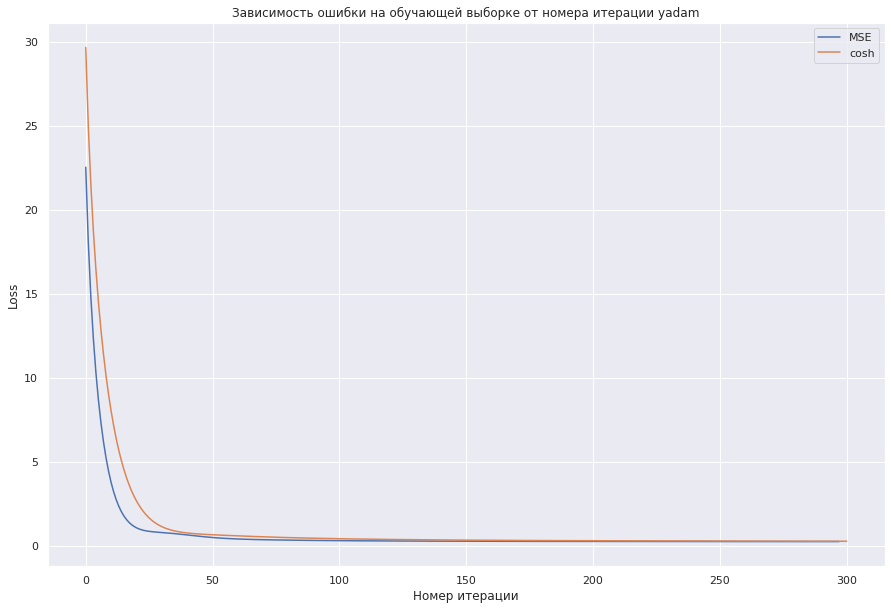

In [ ]:
for descent in descent_names:
  plt.figure(figsize=(15, 10))
  plt.plot(loss_story_without[descent], label='MSE')
  plt.plot(loss_story_cosh[descent], label='cosh')

  plt.legend()
  plt.title('Зависимость ошибки на обучающей выборке от номера итерации у' + descent)
  plt.xlabel('Номер итерации')
  plt.ylabel('Loss')
  plt.show()